**Importing necessary libraies**

In [107]:
# Necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

**Loading the dataset**

In [109]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]
data = pd.read_csv(url, header=None, names=columns)

**Data Overview**

In [111]:
data.head()

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [117]:
data.tail() 

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [119]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   feature_1   569 non-null    float64
 3   feature_2   569 non-null    float64
 4   feature_3   569 non-null    float64
 5   feature_4   569 non-null    float64
 6   feature_5   569 non-null    float64
 7   feature_6   569 non-null    float64
 8   feature_7   569 non-null    float64
 9   feature_8   569 non-null    float64
 10  feature_9   569 non-null    float64
 11  feature_10  569 non-null    float64
 12  feature_11  569 non-null    float64
 13  feature_12  569 non-null    float64
 14  feature_13  569 non-null    float64
 15  feature_14  569 non-null    float64
 16  feature_15  569 non-null    float64
 17  feature_16  569 non-null    float64
 18  feature_17  569 non-null    float64
 19  feature_18  569 non-null    f

In [121]:
data.describe()

,ID,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [123]:
data.describe().T # Transpose to view in better format

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
feature_1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
feature_2,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
feature_3,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
feature_4,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
feature_5,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
feature_6,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
feature_7,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
feature_8,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
feature_9,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [125]:
print(f"Shape of dataset: {data.shape}")

Shape of dataset: (569, 32)


**To check for duplicate rows**

In [127]:
num_total_rows = len(data)
num_duplicate_rows = data.duplicated().sum()
percentage_duplicates = (num_duplicate_rows / num_total_rows) * 100
print(f"\nNumber of Rows with Duplicates: {num_duplicate_rows}")
print(f"Percentage of Duplicate Rows: {percentage_duplicates:.2f}%")


Number of Rows with Duplicates: 0
Percentage of Duplicate Rows: 0.00%


**Counting and Displaying the unique Counts**

In [129]:
# Count unique values for each column 
unique_counts = data.nunique()
# Display the unique counts 
print(unique_counts)

ID            569
Diagnosis       2
feature_1     456
feature_2     479
feature_3     522
feature_4     539
feature_5     474
feature_6     537
feature_7     537
feature_8     542
feature_9     432
feature_10    499
feature_11    540
feature_12    519
feature_13    533
feature_14    528
feature_15    547
feature_16    541
feature_17    533
feature_18    507
feature_19    498
feature_20    545
feature_21    457
feature_22    511
feature_23    514
feature_24    544
feature_25    411
feature_26    529
feature_27    539
feature_28    492
feature_29    500
feature_30    535
dtype: int64


In [141]:
if 'ID' in data.columns:
    data.drop('ID', axis=1, inplace=True)

**Encoding 'Diagnosis' column (1 for Malignant, 0 for Benign)**

In [143]:
# Encode Labels
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

**Check for missing values**

In [153]:
missing_values = data.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)
# Confirm if there are no missing values
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Some columns have missing values.")


Missing values in each column:
Diagnosis     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64
No missing values found in the dataset.


**Target Distribution Visualization, and Feature Correlation Analysis**

C:\Users\91979\AppData\Local\Temp\ipykernel_22756\1619608480.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Diagnosis', data=data, palette={'0': 'blue', '1': 'red'})


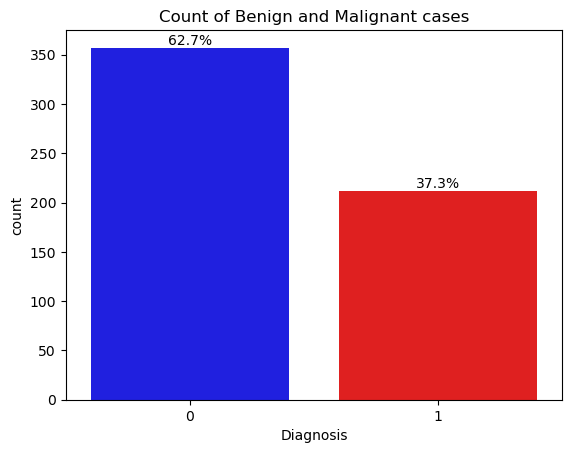

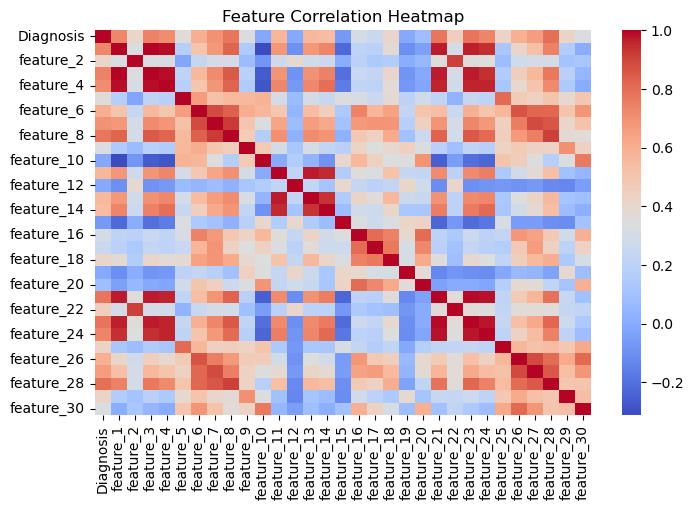

In [147]:
# Countplot of the target variable (Benign vs Malignant) with percentages on top
ax = sns.countplot(x='Diagnosis', data=data, palette={'0': 'blue', '1': 'red'})
plt.title('Count of Benign and Malignant cases')

# Calculate percentages and add text annotations
total = len(data)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{count / total * 100:.1f}%'
    ax.text(p.get_x() + p.get_width() / 2, count + 3, percentage, ha="center")

plt.show()

# Correlation heatmap to visualize relationships between features
plt.figure(figsize=(8, 5))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

**Outlier Detection**

In [161]:
# Calculate and visualize the impact of outliers
# Define IQR method for outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [166]:
# Identify outliers
outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))
print("\nOutliers detected:")
print(outliers.sum())


Outliers detected:
Diagnosis      0
feature_1     14
feature_2      7
feature_3     13
feature_4     25
feature_5      6
feature_6     16
feature_7     18
feature_8     10
feature_9     15
feature_10    15
feature_11    38
feature_12    20
feature_13    38
feature_14    65
feature_15    30
feature_16    28
feature_17    22
feature_18    19
feature_19    27
feature_20    28
feature_21    17
feature_22     5
feature_23    15
feature_24    35
feature_25     7
feature_26    16
feature_27    12
feature_28     0
feature_29    23
feature_30    24
dtype: int64


In [168]:
# Get the number of outliers for each column
num_outliers_per_column = outliers.sum()

**Visualization of the number of outliers per feature**

C:\Users\91979\AppData\Local\Temp\ipykernel_22756\740597524.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values, palette='viridis')  # Set color palette


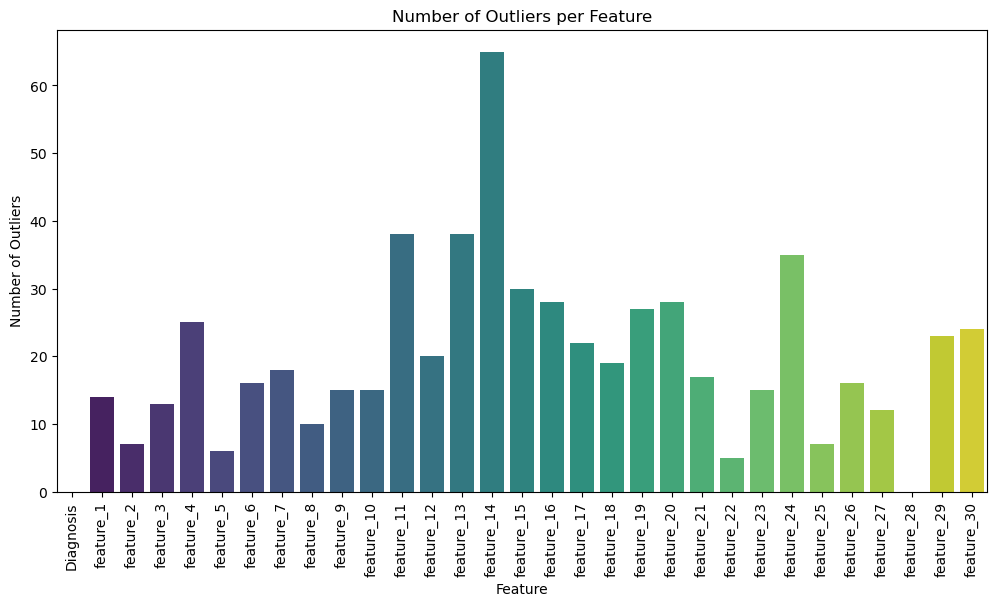

In [174]:
# Visualize the number of outliers per feature with a color palette
plt.figure(figsize=(12, 6))
sns.barplot(x=num_outliers_per_column.index, y=num_outliers_per_column.values, palette='viridis')  # Set color palette
plt.xticks(rotation=90)
plt.title("Number of Outliers per Feature")
plt.xlabel("Feature")
plt.ylabel("Number of Outliers")
plt.show()


**Removing Outliers**

In [176]:
# Remove outliers from the dataset
data_no_outliers = data[~outliers.any(axis=1)]

**Spliting data into features and labels**

In [185]:
X = data_no_outliers.drop('Diagnosis', axis=1)
y = data_no_outliers['Diagnosis']

**Scaling and displaying the firset few rows of the scaled features**

In [187]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.964461   0.377377   1.973596   2.108920   0.112751   0.650915   
1   0.134540   0.594978   0.225722   0.033027   2.126689   2.239566   
2   1.065623   1.211941   0.968866   1.020884  -0.930314  -0.560180   
3   0.968887  -0.157666   1.022372   0.945414   0.317713   1.229127   
4   0.997102   1.393701   1.028317   0.953051  -0.768502   0.399021   

   feature_7  feature_8  feature_9  feature_10  ...  feature_21  feature_22  \
0   1.066356   1.488638   0.277054   -0.756789  ...    2.413510    0.521788   
1   0.677832   0.935739   2.210386    2.655183  ...    0.610898    0.607065   
2  -0.560181  -0.104415  -1.002217   -0.846630  ...    1.270617    1.626840   
3   0.797817   1.178389   0.507899   -0.077988  ...    1.651581    0.454277   
4   0.794553   0.693088   0.531946   -1.563363  ...    0.542758    0.521788   

   feature_23  feature_24  feature_25  feature_26  feature_27  feature_28  \
0    2.468580    2.66

**Spliting data into training and test sets**

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

**Applying SMOTE on training data**

In [257]:
# Applying SMOTE on training data only
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

**Initializing AdaBoost Classifier**

In [260]:
# Initialize AdaBoost classifier
ada_classifier = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),  # Decision stump as weak learner
    n_estimators=50,  # Number of weak learners
    learning_rate=1.0,  # Default learning rate
    algorithm="SAMME",  # Set to SAMME to avoid the FutureWarning
    random_state=42
)

**Training the Model**

In [200]:
# Training the model with SMOTE-applied data
ada_classifier.fit(X_train_smote, y_train_smote)

AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

**Predicting on the Test Set**

In [202]:
# Evaluate the model on the test set
y_pred = ada_classifier.predict(X_test)

**Calculating Performance Metrics**

In [210]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

**Displaying Evaluation Metrics and Visualization Of the Confusion Matrix**


Accuracy: 0.9625

Precision: 0.9583

Recall: 0.9200

F1 Score: 0.9388

Confusion Matrix:
[[54  1]
 [ 2 23]]


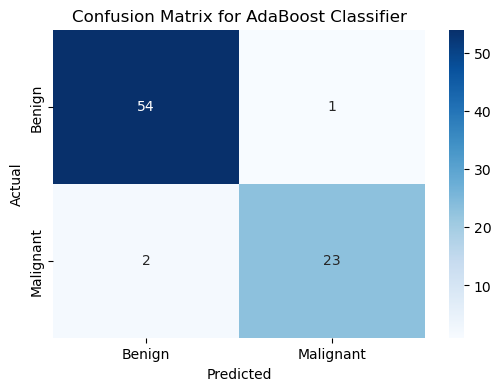

In [229]:
# Displaying the evaluation results
print(f"\nAccuracy: {accuracy:.4f}")
print(f"\nPrecision: {precision:.4f}")
print(f"\nRecall: {recall:.4f}")
print(f"\nF1 Score: {f1:.4f}")
print("\nConfusion Matrix:")
print(confusion)

# Visualize the Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for AdaBoost Classifier')
plt.show()

**Generating the classification report**

In [219]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.96      0.92      0.94        25

    accuracy                           0.96        80
   macro avg       0.96      0.95      0.96        80
weighted avg       0.96      0.96      0.96        80

